In [93]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import itertools
import seaborn as sns

In [94]:
# Import 'data2.csv'
dataset = pd.read_csv('data2.csv')

In [95]:
# Display data frame
dataset

,Mouth_Open_mean,Mouth_Open_std,Mouth_Open_skew,Mouth_Open_median,Mouth_Open_range,Mouth_Closed_mean,Mouth_Closed_std,Mouth_Closed_skew,Mouth_Closed_median,Mouth_Closed_range,...,Scared_skew,Scared_median,Scared_range,Disgusted_mean,Disgusted_std,Disgusted_skew,Disgusted_median,Disgusted_range,Artificiality,Expressiveness
0,-0.316932,-0.139323,0.520572,0.0,0.941697,0.316932,-0.139323,-0.520572,0.0,0.941697,...,-0.970592,2.747127,1.184609,0.057078,0.414716,-0.944344,-0.372363,-0.117168,2,1
1,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.646273,1.371597,1.610766,-0.433304,-0.478654,-0.305011,-0.390614,-0.611292,2,1
2,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.576356,-0.449818,-0.762836,0.141593,0.052487,-0.552835,0.188107,0.401741,2,1
3,-0.370426,-0.525913,5.275935,0.0,0.941697,0.370426,-0.525913,-5.275935,0.0,0.941697,...,0.058838,-0.522081,-0.724757,-0.432911,-0.389509,2.127730,-0.388828,0.467995,2,1
4,-0.329409,-0.196029,0.666669,0.0,0.941697,0.329409,-0.196029,-0.666669,0.0,0.941697,...,-0.186299,-0.501932,-0.780710,-0.263131,-0.336069,-0.344270,-0.218242,-0.146029,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.065881,0.497312,-0.098430,0.0,0.941697,0.065881,0.497312,0.098430,0.0,0.941697,...,-0.044906,-0.480628,-0.737813,-0.370943,-0.445075,-0.096357,-0.307964,-0.647984,1,2
76,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.784188,-0.447860,-0.894541,1.152373,0.734544,-1.101117,1.321316,0.536515,1,2
77,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.594041,1.841547,1.062892,-0.291811,-0.449079,-0.938267,-0.219532,-0.727922,1,2
78,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.832775,1.096518,0.680805,-0.384148,-0.495723,-0.622063,-0.321983,-0.617139,1,2


In [96]:
# VIF test for multicollinearity
X_Artificiality = dataset.drop(['Expressiveness','Artificiality'], axis=1)  
y_Artificiality = dataset['Artificiality'] 

# VIF for each predictor variable
X_Artificiality = sm.add_constant(X_Artificiality) 
vif = pd.Series([variance_inflation_factor(X_Artificiality.values, i) for i in range(X_Artificiality.shape[1])],
                index=X_Artificiality.columns)

# Variables above the threshold
vif_threshold = 10  
multicollinear_vars = vif[vif > vif_threshold]  
num_multicollinear_vars = len(multicollinear_vars)
num_non_multicollinear_vars = len(vif) - num_multicollinear_vars

# Display VIF above/below threshold and multicollinear variables
print("Number of variables with VIF above threshold ({}): {}".format(vif_threshold, num_multicollinear_vars))
print("Number of variables with VIF below threshold ({}): {}".format(vif_threshold, num_non_multicollinear_vars))
print("Multicollinear variables:", multicollinear_vars.index.tolist())

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Number of variables with VIF above threshold (10): 88
Number of variables with VIF below threshold (10): 8
Multicollinear variables: ['Mouth_Open_mean', 'Mouth_Open_std', 'Mouth_Open_skew', 'Mouth_Open_range', 'Mouth_Closed_mean', 'Mouth_Closed_std', 'Mouth_Closed_skew', 'Mouth_Closed_range', 'Left Eye_Open_mean', 'Left Eye_Open_std', 'Left Eye_Open_skew', 'Left Eye_Open_median', 'Left Eye_Open_range', 'Left Eye_Closed_mean', 'Left Eye_Closed_std', 'Left Eye_Closed_skew', 'Left Eye_Closed_median', 'Left Eye_Closed_range', 'Right Eye_Open_mean', 'Right Eye_Open_std', 'Right Eye_Open_skew', 'Right Eye_Open_median', 'Right Eye_Open_range', 'Right Eye_Closed_mean', 'Right Eye_Closed_std', 'Right Eye_Closed_skew', 'Right Eye_Closed_median', 'Right Eye_Closed_range', 'Left Eyebrow_Neutral_mean', 'Left Eyebrow_Neutral_std', 'Left Eyebrow_Neutral_skew', 'Left Eyebrow_Neutral_median', 'Left Eyebrow_Neutral_range', 'Left Eyebrow_Raised_mean', 'Left Eyebrow_Raised_std', 'Left Eyebrow_Raised_skew'

In [97]:
# Preparing the data for modeling Artificiality Base
# Extract features by dropping target columns from the dataset
X_Artificiality_base = dataset.drop(['Expressiveness', 'Artificiality'], axis=1)

# Extract target variable 'Artificiality' from the dataset
y_Artificiality_base = dataset['Artificiality']

# Split the data into training and testing sets (80% training, 20% testing)
# The split is stratified by the target variable 'Artificiality' to maintain the distribution in both sets
X_train_Artificiality_base, X_test_Artificiality_base, y_train_Artificiality_base, y_test_Artificiality_base = train_test_split(X_Artificiality_base, y_Artificiality_base, test_size=0.2, random_state=42, stratify=y_Artificiality_base)

In [98]:
# Evaluation function to print model metrics
def evaluate_and_print_metrics(model_name, grid_search, X_test, y_test):
    # Predict class labels for the test set using best estimator from grid search
    predictions = grid_search.best_estimator_.predict(X_test)
    
    # Calculate F1-score for the model on test data
    f1_value = f1_score(y_test, predictions, average='binary')
    
    # Print model name and its metrics
    print(f"{model_name} Metrics:")
    print(f"Average CV F1-Score: {grid_search.best_score_:.4f}")
    print(f"Test F1-Score: {f1_value:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\n")

# Define hyperparameter grid for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1]}

# Apply GridSearchCV for hyperparameter tuning on Logistic Regression model
grid_search_lr_Artificiality_base = GridSearchCV(LogisticRegression(max_iter=100, penalty='l2'), param_grid=param_grid_lr, cv=10, scoring='f1', n_jobs=-1)
grid_search_lr_Artificiality_base.fit(X_train_Artificiality_base, y_train_Artificiality_base)

# Evaluate and print metrics for Logistic Regression (Artificiality Base) model
evaluate_and_print_metrics("Logistic Regression (Artificiality Base)", grid_search_lr_Artificiality_base, X_test_Artificiality_base, y_test_Artificiality_base)

# Create a Random Forest Classifier instance
rf_Artificiality_base = RandomForestClassifier()

# Define hyperparameter grid for Random Forest
param_grid_rf_Artificiality_base = {
    'n_estimators': [10, 20, 30, 50],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Apply GridSearchCV for hyperparameter tuning on Random Forest model
grid_search_rf_Artificiality_base = GridSearchCV(rf_Artificiality_base, param_grid=param_grid_rf_Artificiality_base, cv=10, scoring='f1', n_jobs=-1)
grid_search_rf_Artificiality_base.fit(X_train_Artificiality_base, y_train_Artificiality_base)

# Evaluate and print metrics for Random Forest (Artificiality Base) model
evaluate_and_print_metrics("Random Forest (Artificiality Base)", grid_search_rf_Artificiality_base, X_test_Artificiality_base, y_test_Artificiality_base)

Logistic Regression (Artificiality Base) Metrics:
Average CV F1-Score: 0.5181
Test F1-Score: 0.7778

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.88      0.78         8
           2       0.83      0.62      0.71         8

    accuracy                           0.75        16
   macro avg       0.77      0.75      0.75        16
weighted avg       0.77      0.75      0.75        16



Random Forest (Artificiality Base) Metrics:
Average CV F1-Score: 0.7207
Test F1-Score: 0.7500

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         8
           2       0.75      0.75      0.75         8

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16





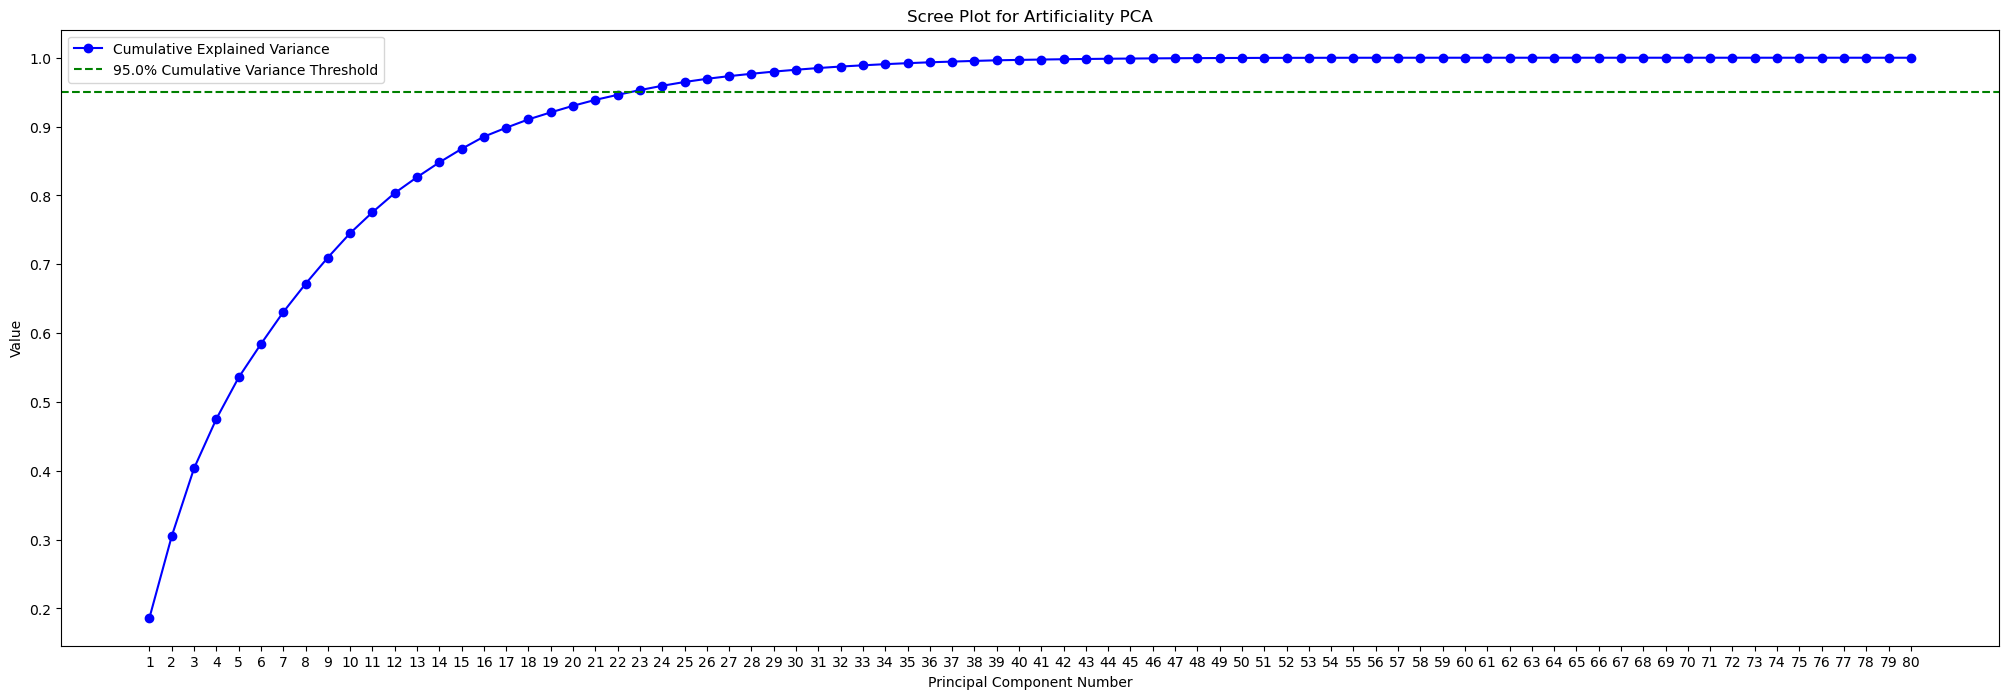

Number of Principal Components for Artificiality with PCA at 95.0% Cumulative Variance: 23


In [99]:
# Prepare data for PCA analysis targeting Artificiality
# Remove target variables to create features set
X_Artificiality_pca = dataset.drop(['Expressiveness', 'Artificiality'], axis=1)
# Extract Artificiality as the target variable
y_Artificiality_pca = dataset['Artificiality']

# Initialize PCA and fit-transform the features data
Artificiality_pca = PCA()
X_Artificiality_pca = Artificiality_pca.fit_transform(X_Artificiality_pca)

# Calculate the explained variance for each principal component
explained_variance_ratio_Artificiality_pca = Artificiality_pca.explained_variance_ratio_
# Calculate the cumulative explained variance across all components
cumulative_variance_ratio_Artificiality_pca = np.cumsum(explained_variance_ratio_Artificiality_pca)

# Set a 95% threshold for the desired cumulative variance
threshold_pca = 0.95
# Find the minimum number of principal components needed to reach or exceed the threshold
num_components_Artificiality_pca = np.argmax(cumulative_variance_ratio_Artificiality_pca >= threshold_pca) + 1

# Plotting the scree plot to visualize cumulative explained variance across principal components
plt.figure(figsize=(25, 8))
plt.plot(range(1, len(cumulative_variance_ratio_Artificiality_pca) + 1), cumulative_variance_ratio_Artificiality_pca, 'bo-', label='Cumulative Explained Variance')
plt.axhline(y=threshold_pca, color='g', linestyle='--', label=f'{threshold_pca*100:.1f}% Cumulative Variance Threshold')
plt.title('Scree Plot for Artificiality PCA')
plt.xlabel('Principal Component Number')
plt.ylabel('Value')
plt.xticks(range(1, len(explained_variance_ratio_Artificiality_pca) + 1))
plt.legend()
plt.show()

# Print the computed number of principal components required to meet the variance threshold
print(f"Number of Principal Components for Artificiality with PCA at {threshold_pca*100:.1f}% Cumulative Variance: {num_components_Artificiality_pca}")

In [100]:
# Reduce the dimensionality of the data using the selected number of principal components for Artificiality
X_reduced_Artificiality_pca = X_Artificiality_pca[:, :num_components_Artificiality_pca]

# Split the reduced data into training and testing sets (80% training, 20% testing)
# The split is stratified by the target variable 'Artificiality' to maintain the distribution in both sets
X_train_Artificiality_pca, X_test_Artificiality_pca, y_train_Artificiality_pca, y_test_Artificiality_pca = train_test_split(X_reduced_Artificiality_pca, y_Artificiality_pca, test_size=0.2, random_state=42, stratify=y_Artificiality_pca)

In [101]:
# Define an evaluation function to assess model performance
def evaluate_and_print_metrics(model_name, grid_search, X_test, y_test):
    # Predict class labels for the test set using best estimator from grid search
    predictions = grid_search.best_estimator_.predict(X_test)
    
    # Calculate F1-score for the model on test data
    f1_value = f1_score(y_test, predictions, average='binary')
    
    # Print model name and its metrics
    print(f"{model_name} Metrics:")
    print(f"Average CV F1-Score: {grid_search.best_score_:.4f}")
    print(f"Test F1-Score: {f1_value:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\n")

# Define hyperparameter grid for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1]}

# Apply GridSearchCV for hyperparameter tuning on Logistic Regression model
grid_search_lr_Artificiality_pca = GridSearchCV(LogisticRegression(max_iter=100, penalty='l2'), param_grid=param_grid_lr, cv=10, scoring='f1', n_jobs=-1)
grid_search_lr_Artificiality_pca.fit(X_train_Artificiality_pca, y_train_Artificiality_pca)

# Evaluate and print metrics for Logistic Regression (Artificiality PCA) model
evaluate_and_print_metrics("Logistic Regression (Artificiality PCA)", grid_search_lr_Artificiality_pca, X_test_Artificiality_pca, y_test_Artificiality_pca)

# Create a Random Forest Classifier instance
rf_Artificiality_pca = RandomForestClassifier()

# Define hyperparameter grid for Random Forest
param_grid_rf_Artificiality_pca = {
    'n_estimators': [10, 20, 30, 50],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Apply GridSearchCV for hyperparameter tuning on Random Forest model
grid_search_rf_Artificiality_pca = GridSearchCV(rf_Artificiality_pca, param_grid=param_grid_rf_Artificiality_pca, cv=10, scoring='f1', n_jobs=-1)
grid_search_rf_Artificiality_pca.fit(X_train_Artificiality_pca, y_train_Artificiality_pca)

# Evaluate and print metrics for Random Forest (Artificiality PCA) model
evaluate_and_print_metrics("Random Forest (Artificiality PCA)", grid_search_rf_Artificiality_pca, X_test_Artificiality_pca, y_test_Artificiality_pca)

Logistic Regression (Artificiality PCA) Metrics:
Average CV F1-Score: 0.5411
Test F1-Score: 0.7500

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         8
           2       0.75      0.75      0.75         8

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16



Random Forest (Artificiality PCA) Metrics:
Average CV F1-Score: 0.6975
Test F1-Score: 0.5556

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.62      0.56         8
           2       0.50      0.38      0.43         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.49        16
weighted avg       0.50      0.50      0.49        16





Best gamma value: 0.001
Number of Principal Components with gamma=0.001 at 95.0% Cumulative Variance: 30


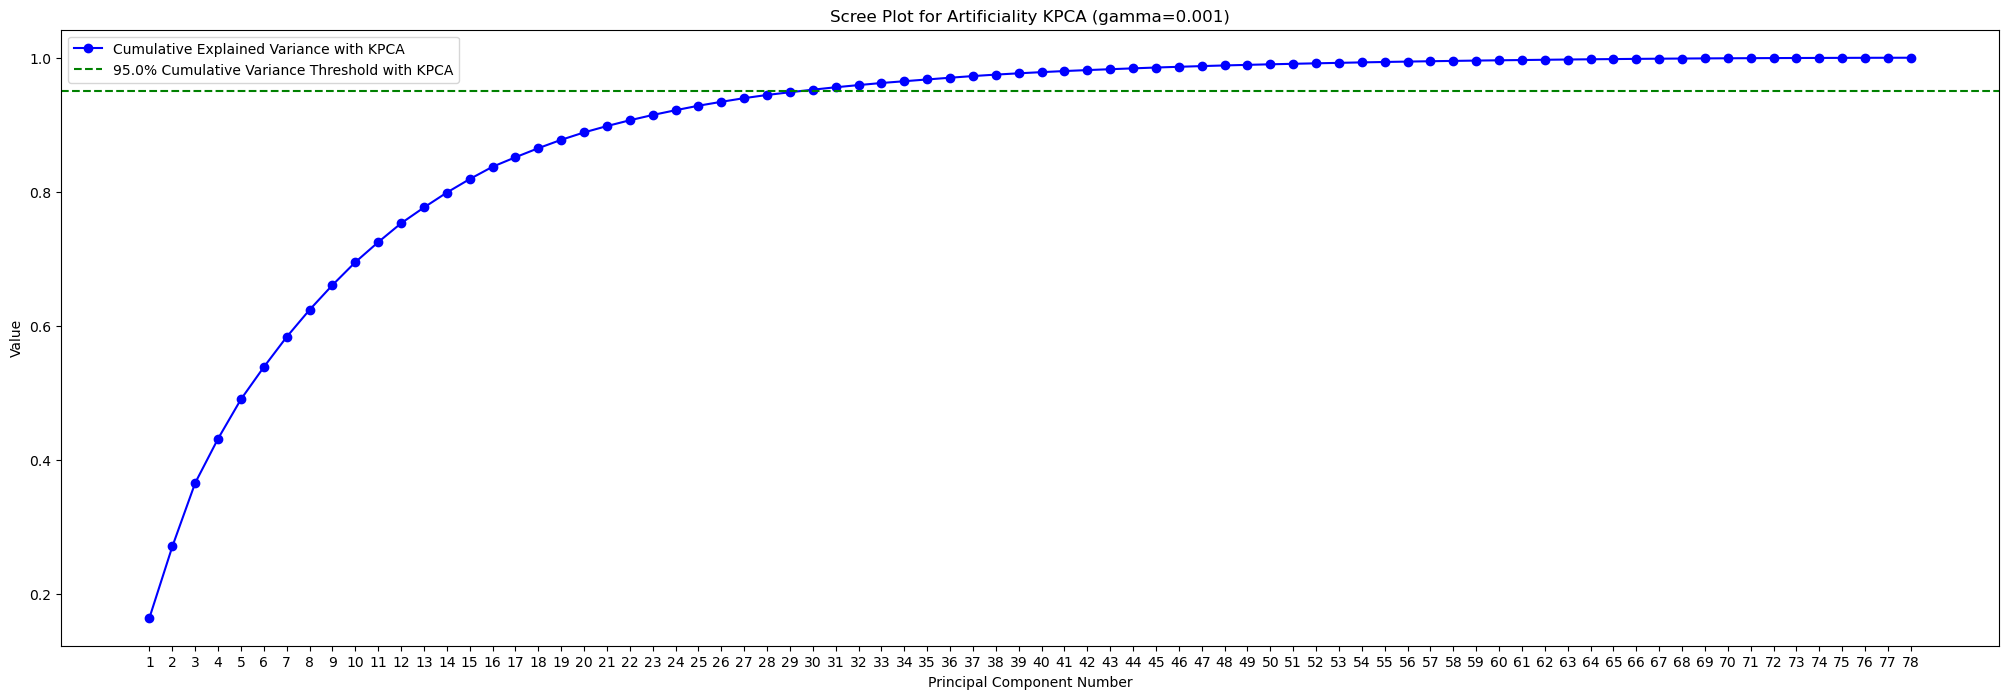

In [102]:
# Extracting features and target variable for Kernel PCA (KPCA)
# Removing the 'Expressiveness' and 'Artificiality' columns to get the feature matrix
X_Artificiality_kpca = dataset.drop(['Expressiveness', 'Artificiality'], axis=1)
# Getting the target variable 'Artificiality'
y_Artificiality_kpca = dataset['Artificiality']

# Define a list of candidate gamma values for the RBF kernel in KPCA
gammas = [0.001, 0.01, 0.1, 1, 10]

# Initialize variables to find the optimal gamma
best_gamma = None
# Initially set the lowest number of components to the total number of original features
lowest_num_components = len(X_Artificiality_kpca.columns)

# Iterate over each candidate gamma value to find the optimal one
for gamma in gammas:
    # Apply KPCA with the RBF kernel and current gamma value
    Artificiality_kpca = KernelPCA(kernel="rbf", gamma=gamma, n_components=None)
    X_A_transformed = Artificiality_kpca.fit_transform(X_Artificiality_kpca)

    # Compute the explained variance ratio for each principal component
    explained_variance_ratio = np.var(X_A_transformed, axis=0) / np.sum(np.var(X_A_transformed, axis=0))
    # Calculate the cumulative explained variance ratio
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Determine the number of components where 95% (or a similar threshold) of the variance is retained
    threshold_kpca = 0.95
    num_components = np.argmax(cumulative_variance_ratio >= threshold_kpca) + 1

    # Update the best gamma if the current one results in fewer principal components
    if num_components < lowest_num_components:
        lowest_num_components = num_components
        best_gamma = gamma

# Display the best gamma value and the number of components for that gamma
print(f"Best gamma value: {best_gamma}")
print(f"Number of Principal Components with gamma={best_gamma} at {threshold_kpca*100:.1f}% Cumulative Variance: {lowest_num_components}")

# Use the best gamma value to transform the data for visualization
Artificiality_kpca_best = KernelPCA(kernel="rbf", gamma=best_gamma, n_components=None)
X_Artificiality_kpca_best = Artificiality_kpca_best.fit_transform(X_Artificiality_kpca)

# Compute the explained variance ratio for the transformed data using the best gamma
explained_variance_ratio_best = np.var(X_Artificiality_kpca_best, axis=0) / np.sum(np.var(X_Artificiality_kpca_best, axis=0))
cumulative_variance_ratio_best = np.cumsum(explained_variance_ratio_best)

# Visualization: scree plot to show the cumulative explained variance for each principal component
plt.figure(figsize=(25, 8))
plt.plot(range(1, len(cumulative_variance_ratio_best) + 1), cumulative_variance_ratio_best, 'bo-', label='Cumulative Explained Variance with KPCA')
plt.axhline(y=threshold_kpca, color='g', linestyle='--', label=f'{threshold_kpca*100:.1f}% Cumulative Variance Threshold with KPCA')
plt.title(f'Scree Plot for Artificiality KPCA (gamma={best_gamma})')
plt.xlabel('Principal Component Number')
plt.ylabel('Value')
plt.xticks(range(1, len(explained_variance_ratio_best) + 1))
plt.legend()
plt.show()

In [103]:
# Reduce the dimensionality using the principal components for Artificiality from KPCA
X_reduced_Artificiality_kpca = X_Artificiality_kpca_best[:, :lowest_num_components]

# Stratified split of the reduced data into 80% training and 20% testing sets
X_train_Artificiality_kpca, X_test_Artificiality_kpca, y_train_Artificiality_kpca, y_test_Artificiality_kpca = train_test_split(X_reduced_Artificiality_kpca, y_Artificiality_kpca, test_size=0.2, random_state=42, stratify=y_Artificiality_kpca)

In [104]:
# Define an evaluation function to assess model performance
def evaluate_and_print_metrics(model_name, grid_search, X_test, y_test):
    # Predict class labels for the test set using best estimator from grid search
    predictions = grid_search.best_estimator_.predict(X_test)
    
    # Calculate F1-score for the model on test data
    f1_value = f1_score(y_test, predictions, average='binary')
    
    # Print model name and its metrics
    print(f"{model_name} Metrics:")
    print(f"Average CV F1-Score: {grid_search.best_score_:.4f}")
    print(f"Test F1-Score: {f1_value:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\n")

# Define hyperparameter grid for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1]}

# Apply GridSearchCV for hyperparameter tuning on Logistic Regression model
grid_search_lr_Artificiality_kpca = GridSearchCV(LogisticRegression(max_iter=100, penalty='l2'), param_grid=param_grid_lr, cv=10, scoring='f1', n_jobs=-1)
grid_search_lr_Artificiality_kpca.fit(X_train_Artificiality_kpca, y_train_Artificiality_kpca)

# Evaluate and print metrics for Logistic Regression (Artificiality KPCA) model
evaluate_and_print_metrics("Logistic Regression (Artificiality KPCA)", grid_search_lr_Artificiality_kpca, X_test_Artificiality_kpca, y_test_Artificiality_kpca)

# Create a Random Forest Classifier instance
rf_Artificiality_kpca = RandomForestClassifier()

# Define hyperparameter grid for Random Forest
param_grid_rf_Artificiality_kpca = {
    'n_estimators': [10, 20, 30, 50],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Apply GridSearchCV for hyperparameter tuning on Random Forest model
grid_search_rf_Artificiality_kpca = GridSearchCV(rf_Artificiality_kpca, param_grid=param_grid_rf_Artificiality_kpca, cv=10, scoring='f1', n_jobs=-1)
grid_search_rf_Artificiality_kpca.fit(X_train_Artificiality_kpca, y_train_Artificiality_kpca)

# Evaluate and print metrics for Random Forest (Artificiality KPCA) model
evaluate_and_print_metrics("Random Forest (Artificiality KPCA)", grid_search_rf_Artificiality_kpca, X_test_Artificiality_kpca, y_test_Artificiality_kpca)

Logistic Regression (Artificiality KPCA) Metrics:
Average CV F1-Score: 0.3005
Test F1-Score: 0.7368

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.88      0.74         8
           2       0.80      0.50      0.62         8

    accuracy                           0.69        16
   macro avg       0.72      0.69      0.68        16
weighted avg       0.72      0.69      0.68        16



Random Forest (Artificiality KPCA) Metrics:
Average CV F1-Score: 0.6550
Test F1-Score: 0.4286

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.38      0.43         8
           2       0.50      0.62      0.56         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.49        16
weighted avg       0.50      0.50      0.49        16





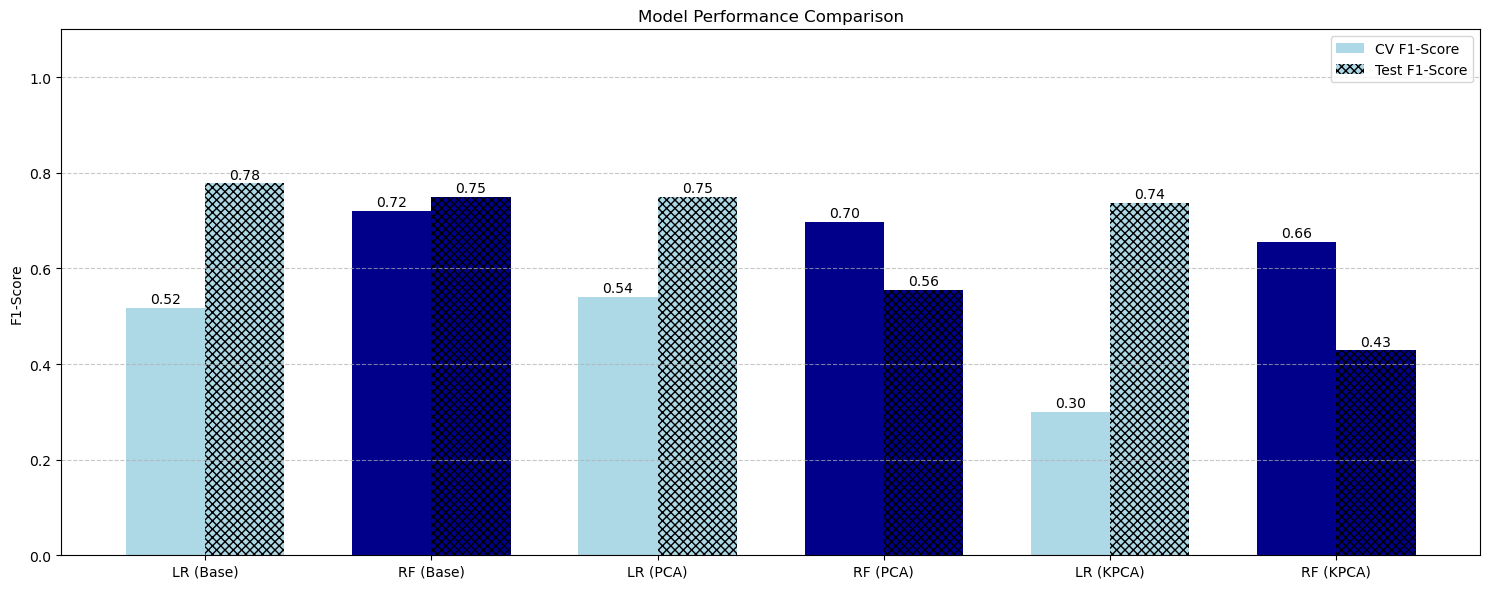

In [105]:
def evaluate_and_return_metrics(grid_search, X_test, y_test):
    # Compute average CV F1-Score and Test F1-Score
    avg_cv_f1 = grid_search.best_score_
    predictions = grid_search.best_estimator_.predict(X_test)
    test_f1 = f1_score(y_test, predictions, average='binary')  # Use 'micro', 'macro' or 'weighted' for multiclass
    return avg_cv_f1, test_f1

# Evaluate models and store results
results = {
    "LR (Base)": evaluate_and_return_metrics(grid_search_lr_Artificiality_base, X_test_Artificiality_base, y_test_Artificiality_base),
    "RF (Base)": evaluate_and_return_metrics(grid_search_rf_Artificiality_base, X_test_Artificiality_base, y_test_Artificiality_base),
    "LR (PCA)": evaluate_and_return_metrics(grid_search_lr_Artificiality_pca, X_test_Artificiality_pca, y_test_Artificiality_pca),
    "RF (PCA)": evaluate_and_return_metrics(grid_search_rf_Artificiality_pca, X_test_Artificiality_pca, y_test_Artificiality_pca),
    "LR (KPCA)": evaluate_and_return_metrics(grid_search_lr_Artificiality_kpca, X_test_Artificiality_kpca, y_test_Artificiality_kpca),
    "RF (KPCA)": evaluate_and_return_metrics(grid_search_rf_Artificiality_kpca, X_test_Artificiality_kpca, y_test_Artificiality_kpca)
}

# Extract names and scores for plotting
names = list(results.keys())
avg_cv_values = [item[0] for item in results.values()]
test_values = [item[1] for item in results.values()]

# Define colors and hatch patterns for plotting
colors = {
    "LR": "lightblue",
    "RF": "darkblue"
}
hatch_patterns = {
    "Avg CV F1-Score": '',
    "Test F1-Score": 'xxxx'
}

# Initialize plot settings
bar_width = 0.35
index = np.arange(len(names))
plt.figure(figsize=(15, 6))

# Plot bars for each model type
for i, (name, avg_cv, test) in enumerate(zip(names, avg_cv_values, test_values)):
    model_type = name.split(" ")[0]
    # Plot bars with corresponding color and hatch pattern
    plt.bar(i - bar_width/2, avg_cv, color=colors[model_type], width=bar_width, label=f"CV F1-Score" if i == 0 else "")
    plt.text(i - bar_width/2, avg_cv + 0.01, f"{avg_cv:.2f}", ha='center', fontsize=10)
    
    plt.bar(i + bar_width/2, test, color=colors[model_type], hatch=hatch_patterns["Test F1-Score"], width=bar_width, label=f"Test F1-Score" if i == 0 else "")
    plt.text(i + bar_width/2, test + 0.01, f"{test:.2f}", ha='center', fontsize=10)

# Configure plot
plt.ylabel('F1-Score')
plt.title('Model Performance Comparison')
plt.xticks(index, names)
plt.legend(loc='upper right')
plt.ylim([0, 1.1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()